##### Copyright 2020 Google

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Fermi-Hubbard spin-charge separation results

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://quantumai.google/cirq/experiments/fermi_hubbard/publication_results"><img src="https://quantumai.google/site-assets/images/buttons/quantumai_logo_1x.png" />View on QuantumAI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/quantumlib/ReCirq/blob/master/docs/fermi_hubbard/publication_results.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/colab_logo_1x.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/quantumlib/ReCirq/blob/master/docs/fermi_hubbard/publication_results.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/github_logo_1x.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/ReCirq/docs/fermi_hubbard/publication_results.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/download_icon_1x.png" />Download notebook</a>
  </td>
</table>

This notebook presents the experimental data which was collected on Google Rainbow processor for the [Fermi-Hubbard spin-charge separation experiment](https://arxiv.org/abs/2010.07965).

In [2]:
try:
    import recirq
except ImportError:
    print("Installing ReCirq...")
    !pip install git+https://github.com/quantumlib/recirq --quiet
    print("Installed ReCirq!")

Installing ReCirq...


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.


Installed ReCirq!


In [3]:
import glob
from tqdm.notebook import tqdm

from recirq.fermi_hubbard import (
    InstanceBundle,
    apply_rescalings_to_bundles,
    find_bundles_rescalings,
    load_experiment,
    plot_quantity
)
from recirq.fermi_hubbard.publication import (
    parasitic_cphase_compensation,
    fetch_publication_data
)

# Hide numpy warnings
import warnings
warnings.filterwarnings('ignore')

## Get the data

In order to run this notebook, the data sets `gaussians_1u1d.zip`, `trapping_2u2d.zip` and `trapping_3u3d.zip` need to be downloaded and extracted from [https://doi.org/10.5061/dryad.crjdfn32v](https://doi.org/10.5061/dryad.crjdfn32v). The function `fetch_publication_data` is a utility to do this.

> **Note**: If you have already downloaded the data, change `data_dir` in the next cell to where your data is located. The function `fetch_publication_data` will skip data that is already downloaded.

In [4]:
data_dir = "fermi_hubbard_data"
fetch_publication_data(base_dir=data_dir)

Successfully downloaded.



Successfully downloaded.



Successfully downloaded.



Successfully downloaded.



## Noninteracting Gaussians

In [5]:
# Load results and create a bundle with extracted quantities.
gaussians_1u1d_files = glob.glob(f'{data_dir}/gaussians_1u1d/0.0/*.json')
gaussians_bundle = InstanceBundle(
    experiments=[load_experiment(file) for file in gaussians_1u1d_files],
    steps=range(65),
    rescale_steps=range(65))

In [6]:
# Simulate the exact numerical results that are used as a reference.
with tqdm(range(len(gaussians_bundle.steps))) as progress:
    def post_run(_1, _2):
        progress.update()
    gaussians_bundle.cache_exact_numerics(post_run_func=post_run)

  0%|          | 0/65 [00:00<?, ?it/s]

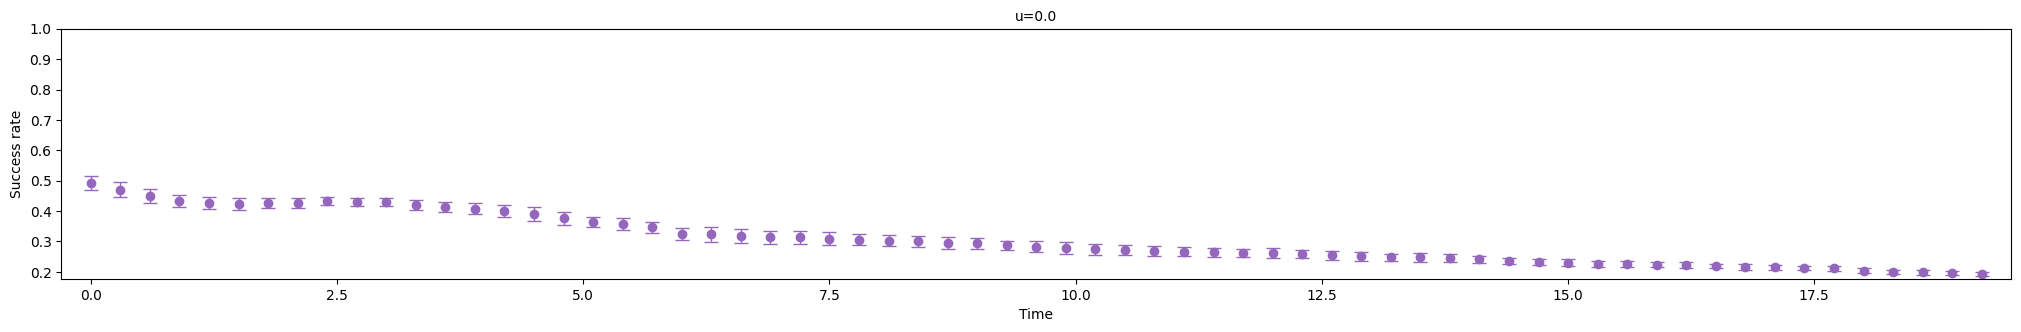

In [7]:
plot_quantity(gaussians_bundle, 'post_selection', show_std_dev=True);

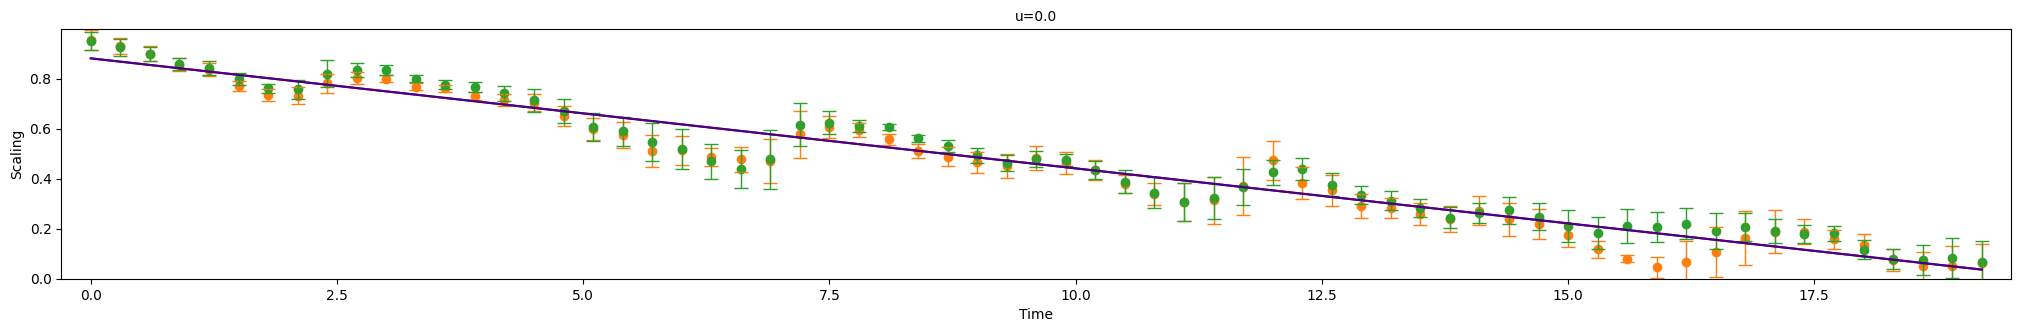

In [8]:
plot_quantity(gaussians_bundle, 'scaling', show_std_error=True);

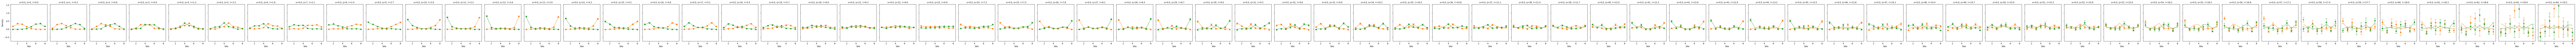

In [9]:
# The data for this quantity can be viewed after double-clicking this cell output.
plot_quantity(gaussians_bundle, 'up_down_density', show_std_error=True);

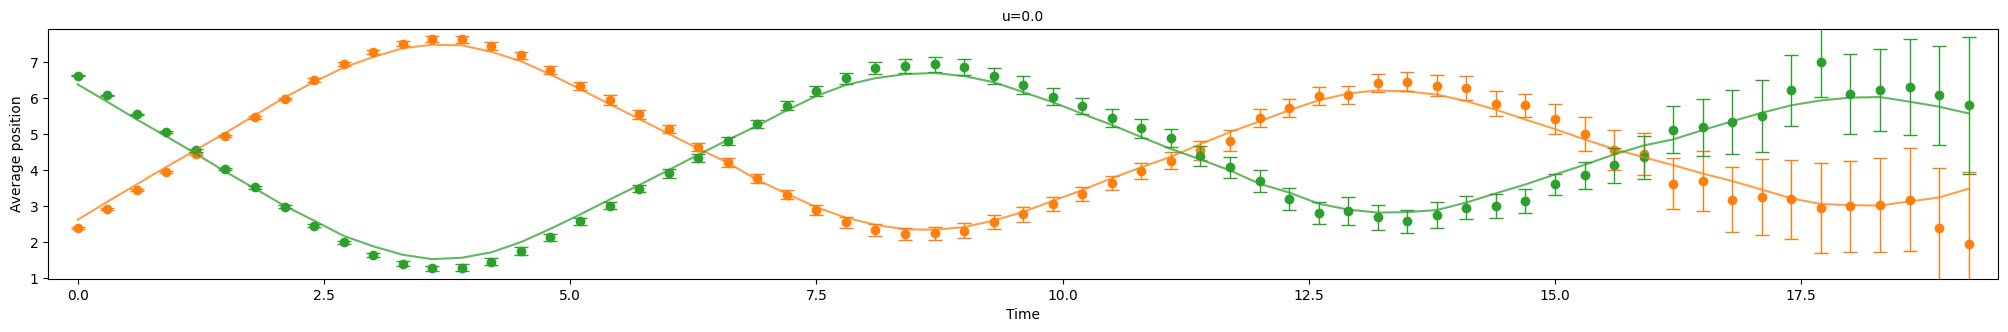

In [10]:
plot_quantity(gaussians_bundle, 'up_down_position_average', show_std_error=True);

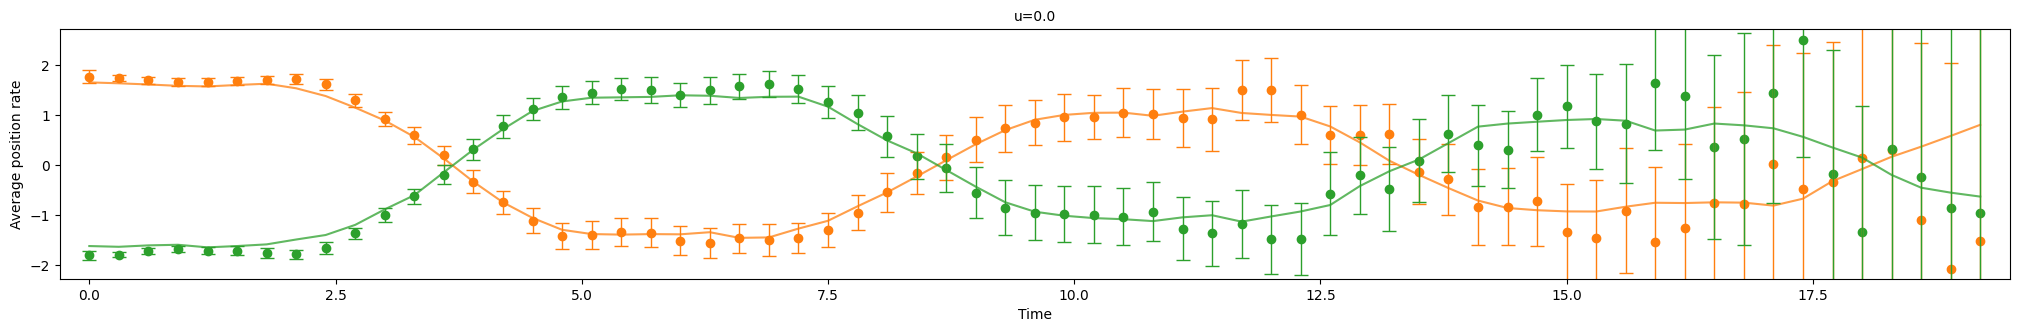

In [11]:
plot_quantity(gaussians_bundle, 'up_down_position_average_dt', show_std_error=True);

## Trapping Potential N=4

In [12]:
# Load results and create a bundles with extracted quantities for each
# interaction strength.
trapping_2u2d_files = [
    glob.glob(f'{data_dir}/trapping_2u2d/{u}/*.json')
    for u in [0.0, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]]
trapping_2u2d_bundles = [InstanceBundle(
    experiments=[load_experiment(file) for file in files],
    numerics_transform=parasitic_cphase_compensation(0.138),
    steps=range(11),
    rescale_steps=range(11)) for files in trapping_2u2d_files]

In [13]:
# Simulate the exact numerical results that are used as a reference.
total_steps = sum(len(bundle.steps) for bundle in trapping_2u2d_bundles)
with tqdm(range(total_steps)) as progress:
    def post_run(_1, _2):
        progress.update()
    for bundle in trapping_2u2d_bundles:
        bundle.cache_exact_numerics(post_run_func=post_run)

  0%|          | 0/110 [00:00<?, ?it/s]

In [14]:
# Use shared rescaling values among compatible problem instances.
apply_rescalings_to_bundles(find_bundles_rescalings(trapping_2u2d_bundles))

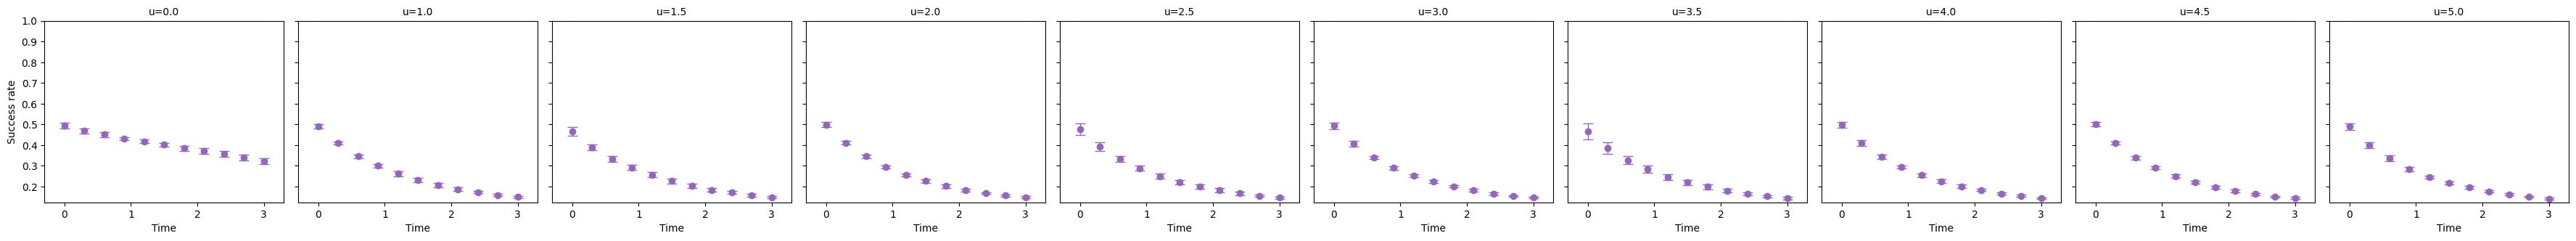

In [15]:
plot_quantity(trapping_2u2d_bundles, 'post_selection', show_std_dev=True);

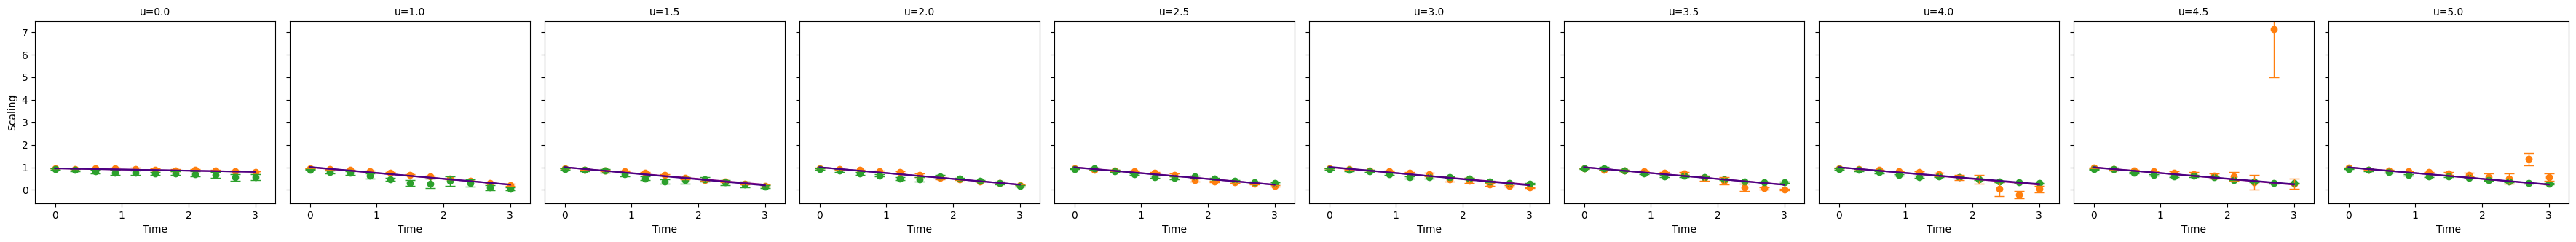

In [16]:
plot_quantity(trapping_2u2d_bundles, 'scaling', show_std_error=True);

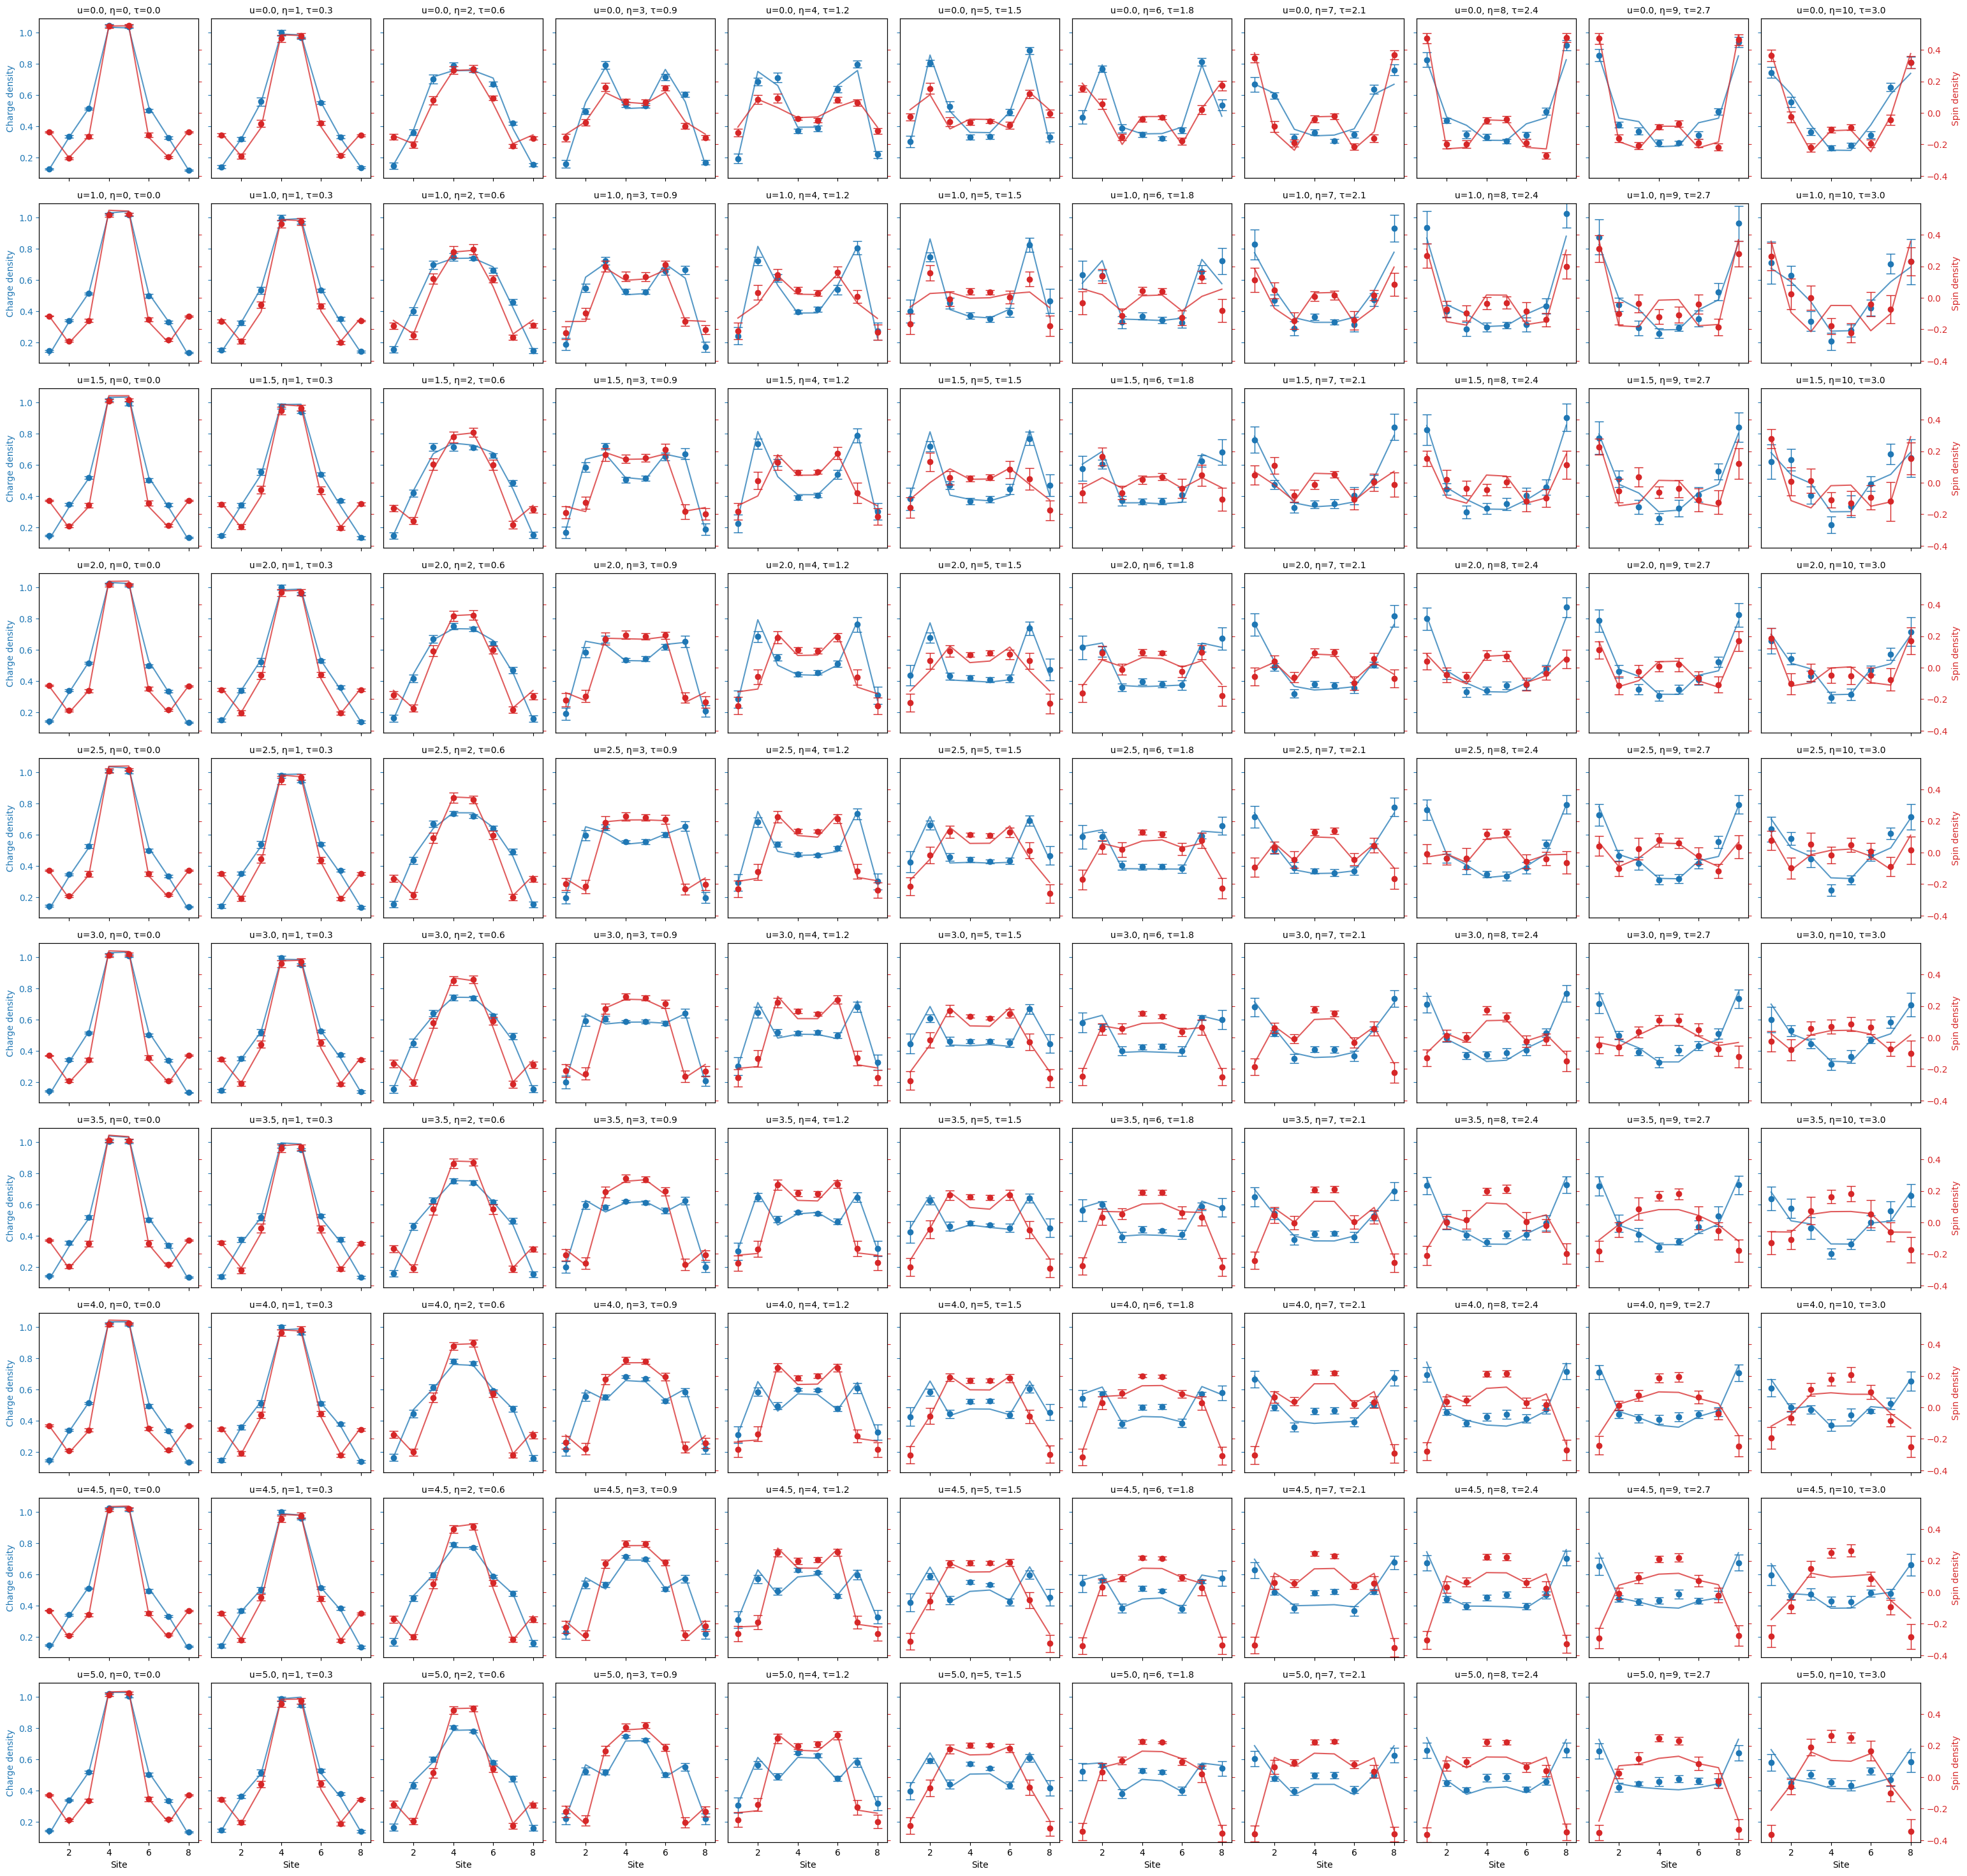

In [17]:
plot_quantity(trapping_2u2d_bundles, 'charge_spin_density', show_std_error=True);

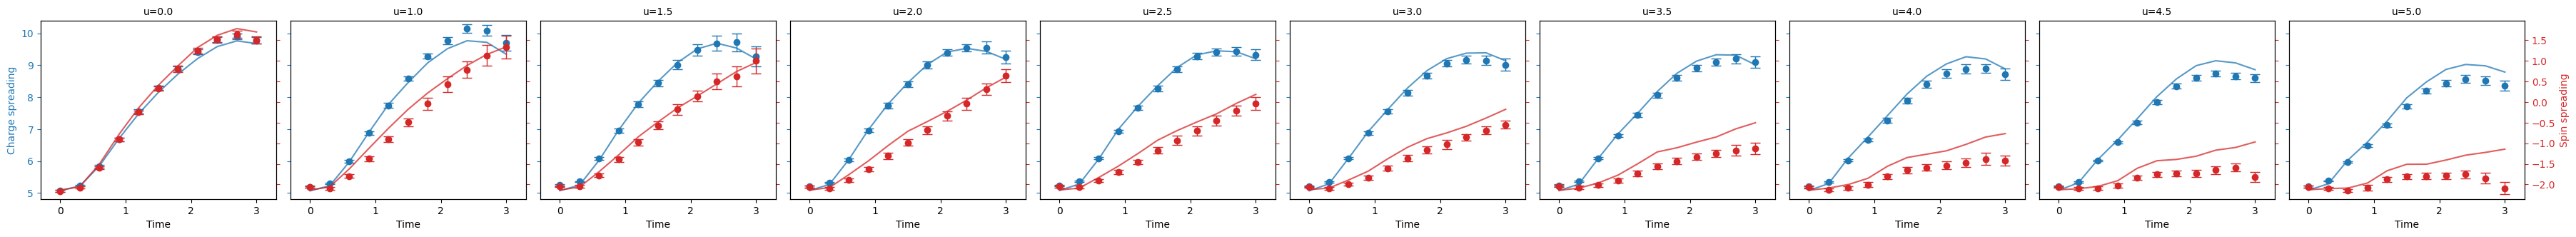

In [18]:
plot_quantity(trapping_2u2d_bundles, 'charge_spin_spreading', show_std_error=True);

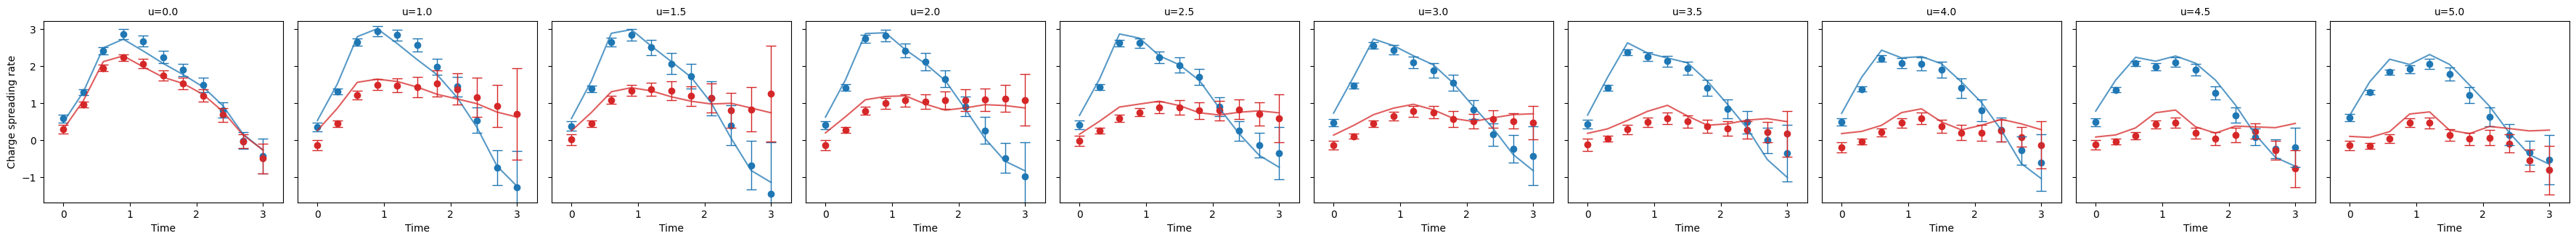

In [19]:
plot_quantity(trapping_2u2d_bundles, 'charge_spin_spreading_dt', show_std_error=True);

## Trapping Potential N=6

In [20]:
# Load results and create a bundles with extracted quantities for each 
# interaction strength.
trapping_3u3d_files = [
    glob.glob(f'{data_dir}/trapping_3u3d/{u}/*.json')
    for u in [0.0, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]]
trapping_3u3d_bundles = [InstanceBundle(
    experiments=[load_experiment(file) for file in files],
    numerics_transform=parasitic_cphase_compensation(0.138),
    steps=range(11),
    rescale_steps=range(11)) for files in trapping_3u3d_files]

In [21]:
# Simulate the exact numerical results that are used as a reference.
total_steps = sum(len(bundle.steps) for bundle in trapping_3u3d_bundles)
with tqdm(range(total_steps)) as progress:
    def post_run(_1, _2):
        progress.update()
    for bundle in trapping_3u3d_bundles:
        bundle.cache_exact_numerics(post_run_func=post_run)

  0%|          | 0/110 [00:00<?, ?it/s]

In [22]:
# Use shared rescaling values among compatible problem instances.
apply_rescalings_to_bundles(find_bundles_rescalings(trapping_3u3d_bundles))

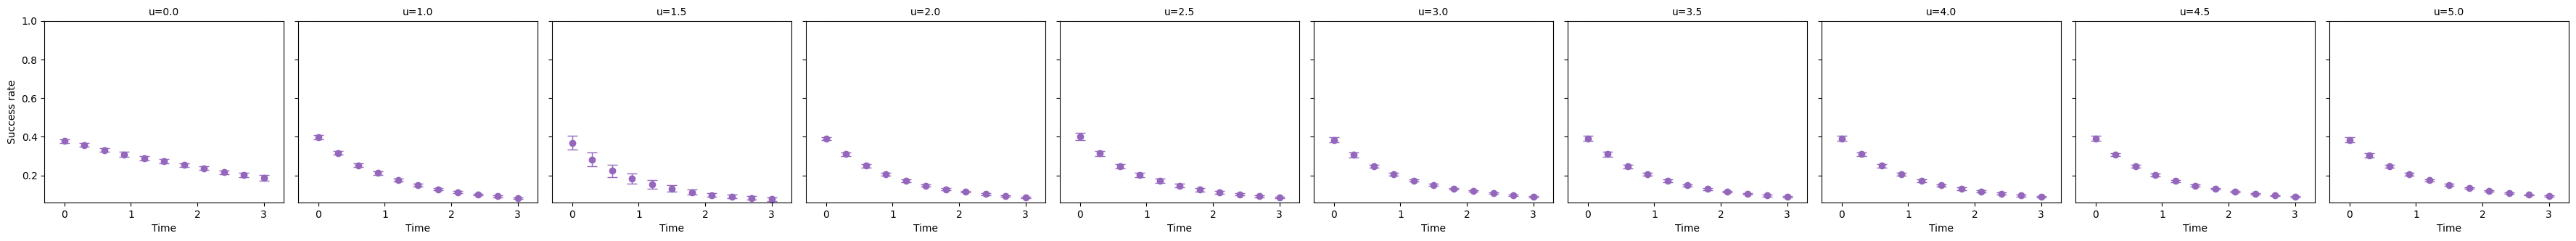

In [23]:
plot_quantity(trapping_3u3d_bundles, 'post_selection', show_std_dev=True);

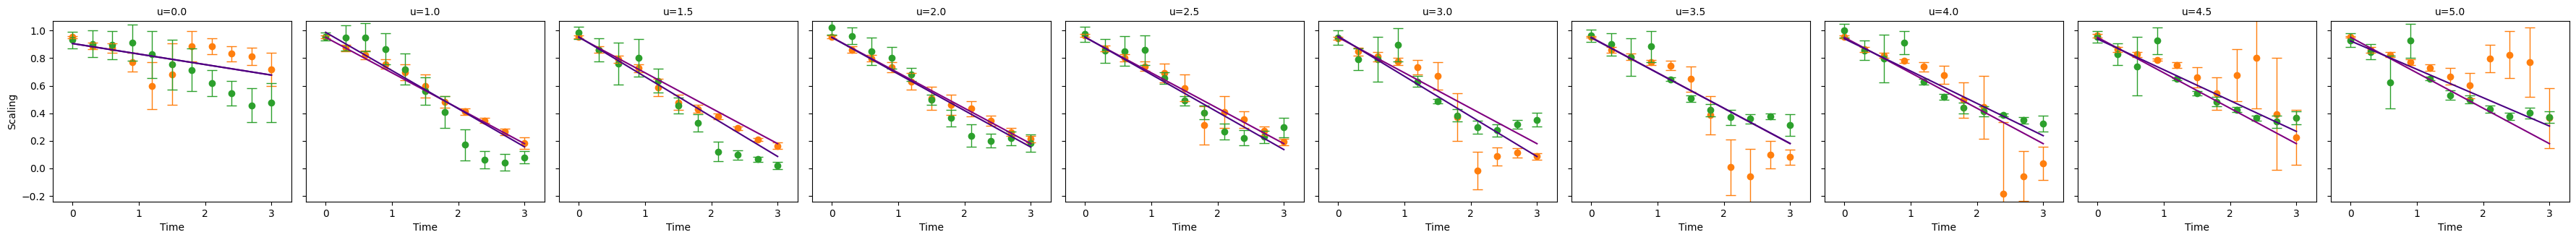

In [24]:
plot_quantity(trapping_3u3d_bundles, 'scaling', show_std_error=True);

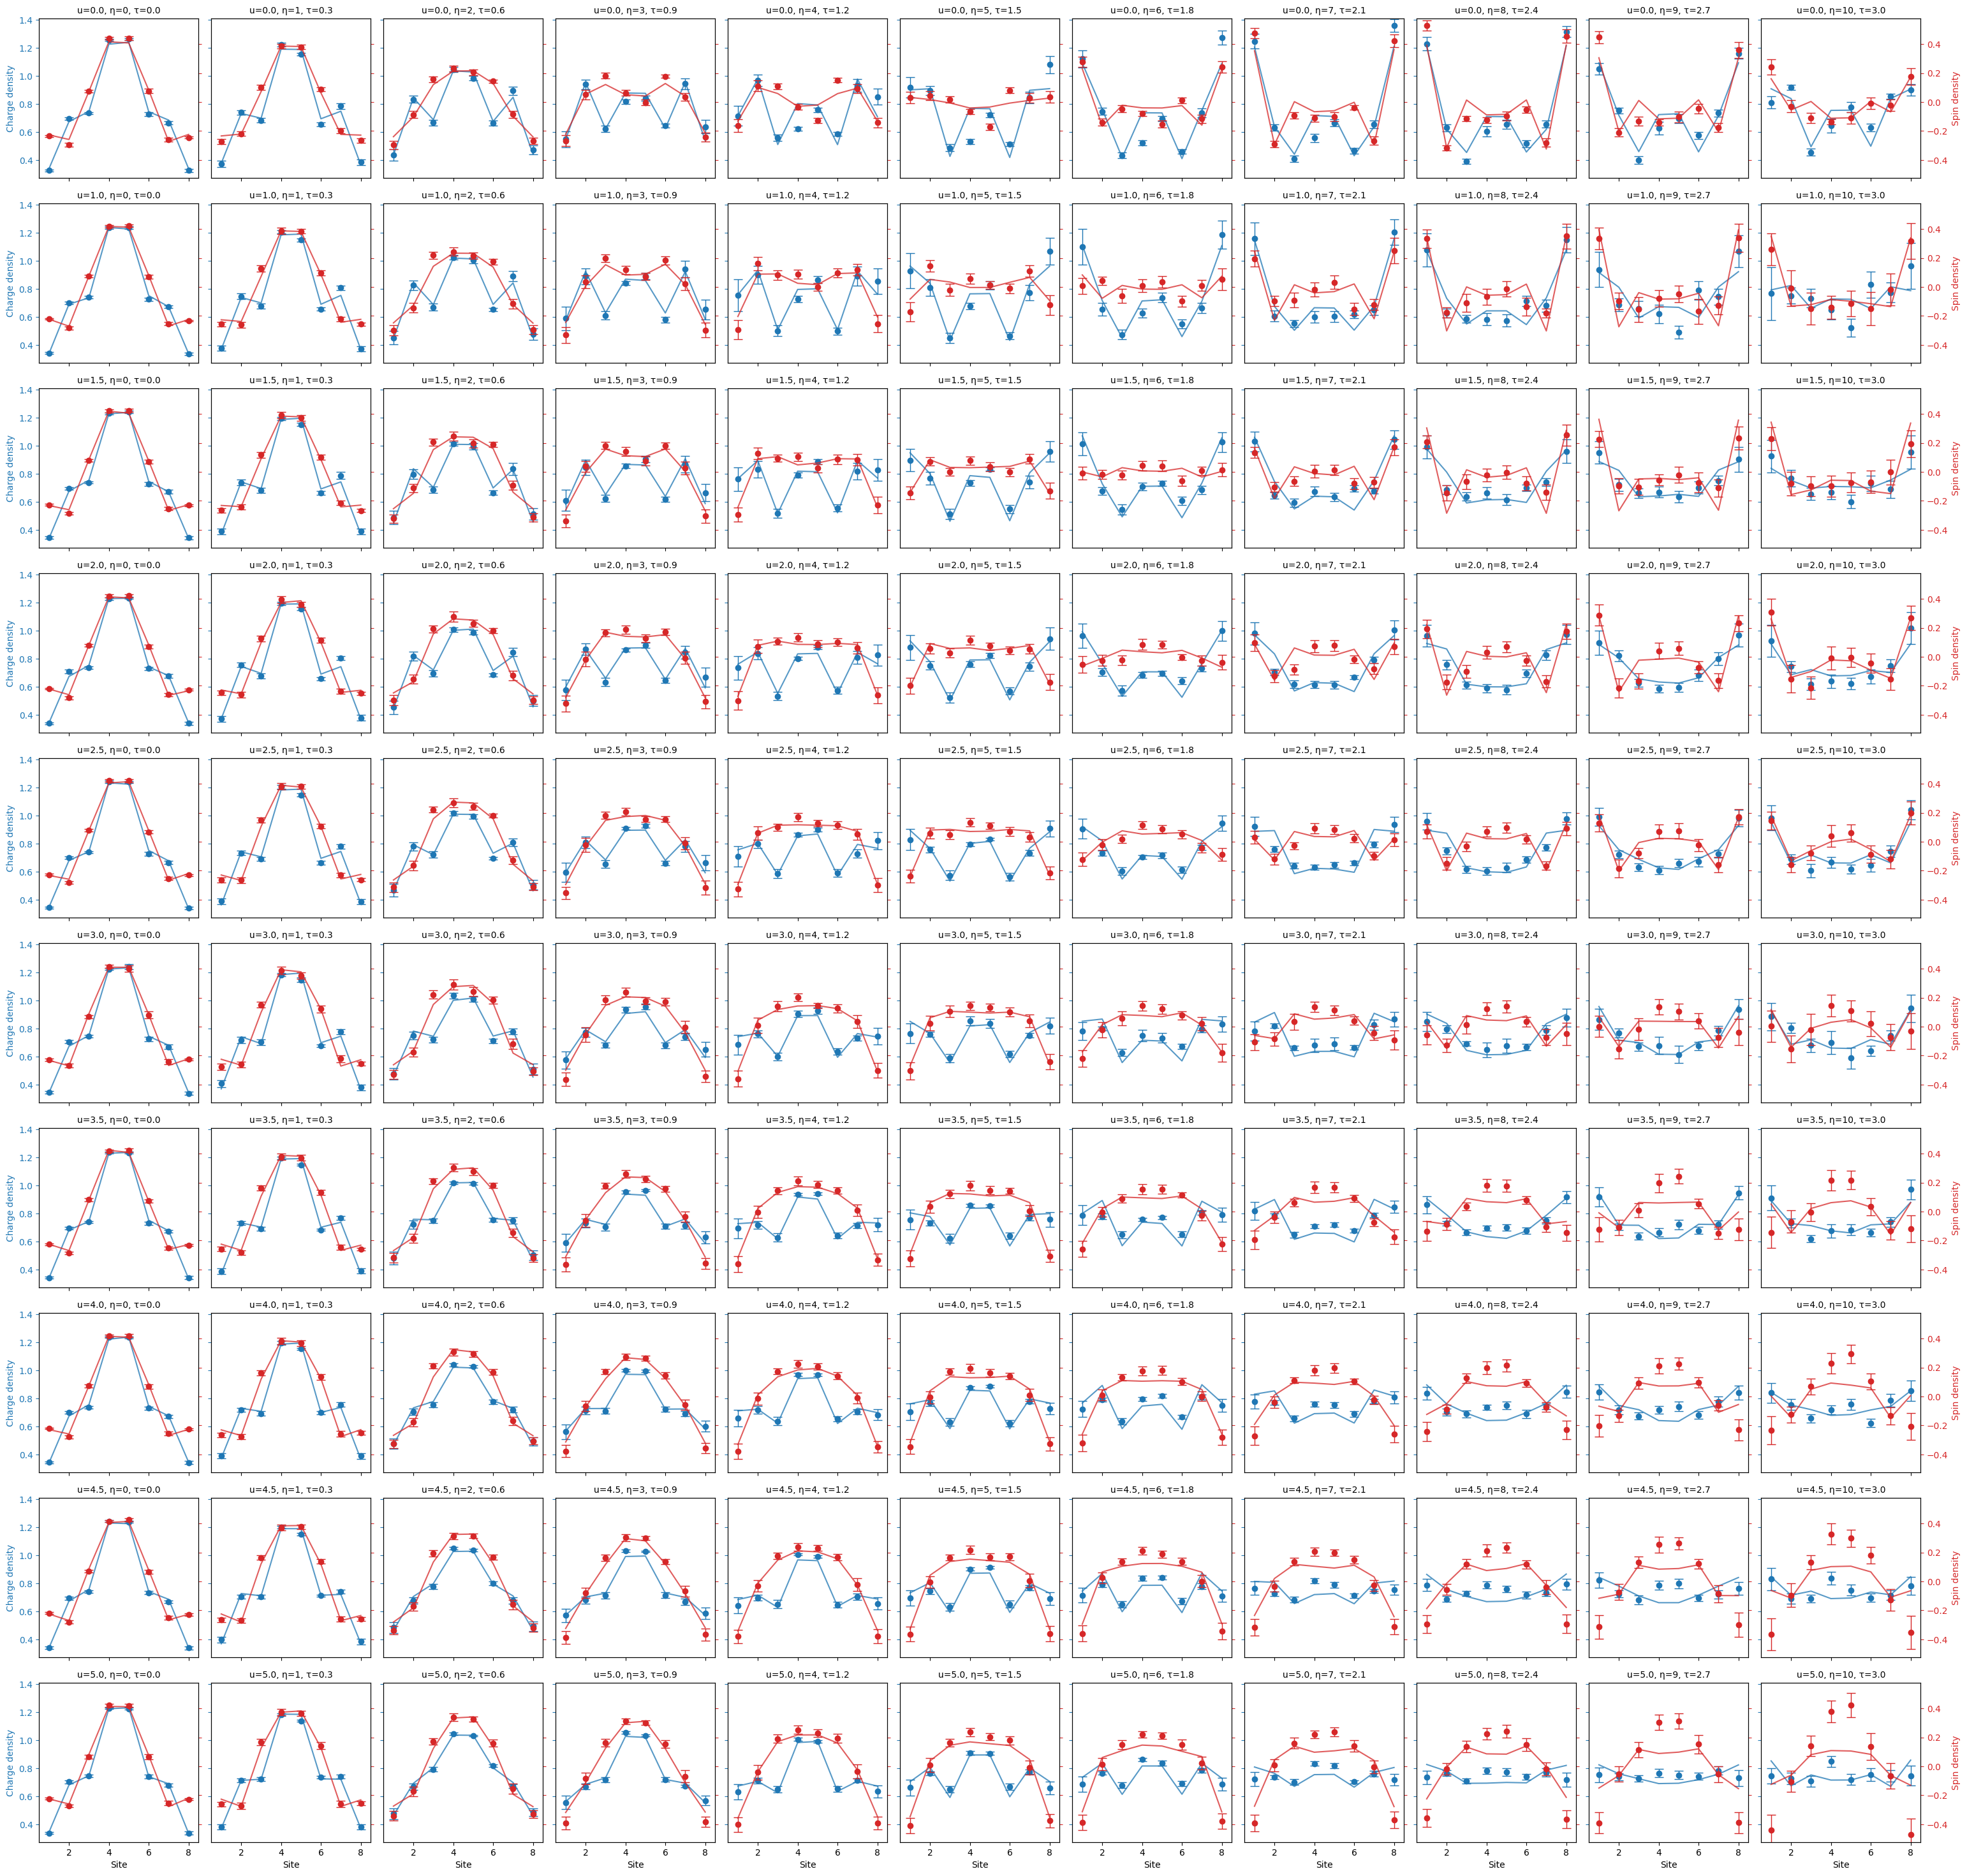

In [25]:
plot_quantity(trapping_3u3d_bundles, 'charge_spin_density', show_std_error=True);

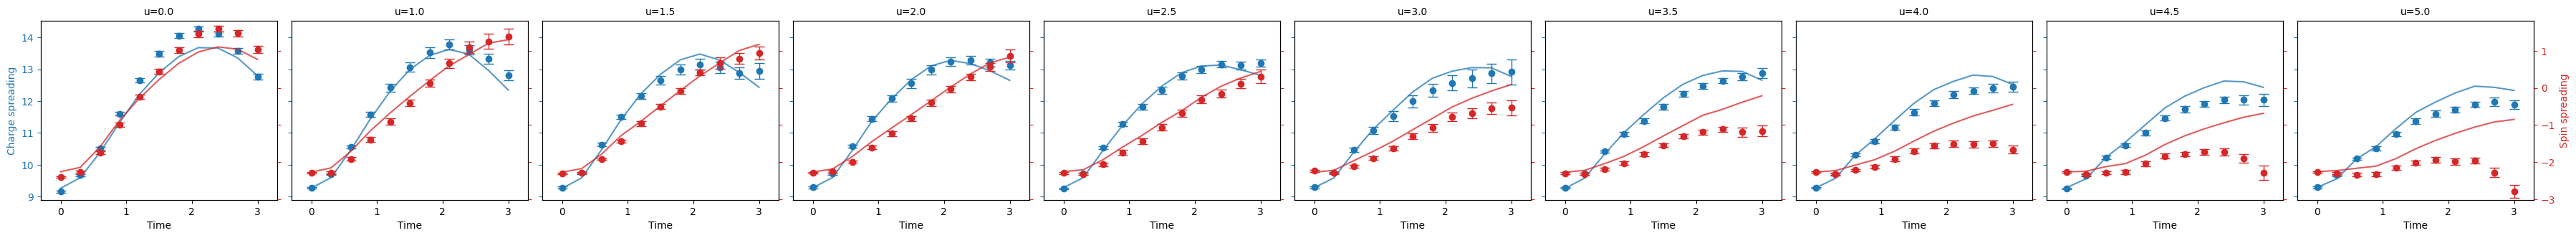

In [26]:
plot_quantity(trapping_3u3d_bundles, 'charge_spin_spreading', show_std_error=True);

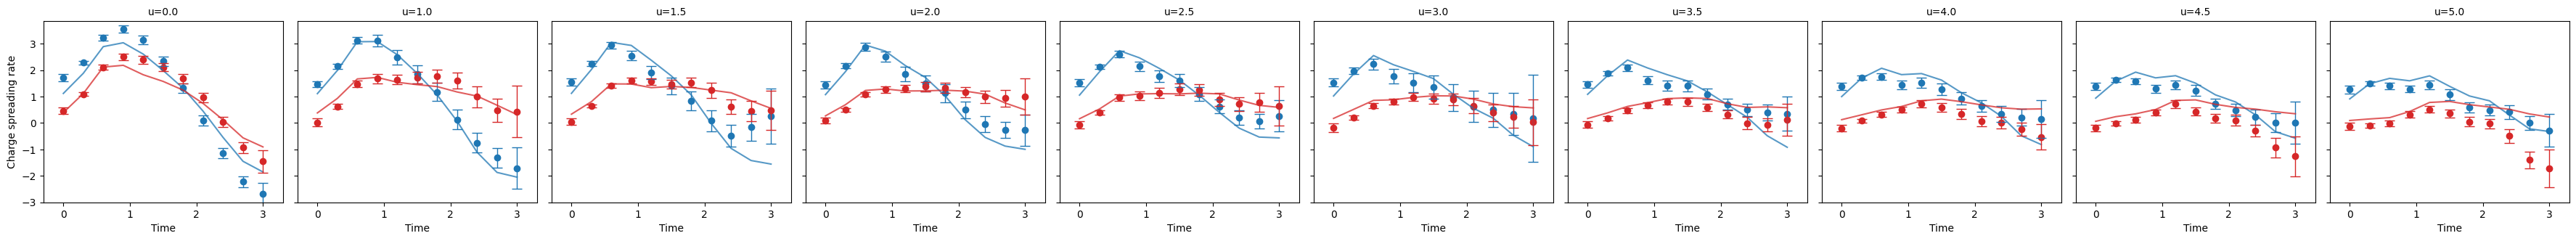

In [27]:
plot_quantity(trapping_3u3d_bundles, 'charge_spin_spreading_dt', show_std_error=True);